In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
v = df['lang'].value_counts()
df_level_count = df[df['lang'].isin(v.index[v.gt(100)])]
level_count = df_level_count['lang'].value_counts()
level_percentage = df_level_count['lang'].value_counts() / df.shape[0] * 100

print(level_count)
print(level_percentage)

en       967822
nl       145791
-         79440
es        11057
fr         2317
pt_br      1105
de          807
zh          288
it          187
Name: lang, dtype: int64
en       80.043304
nl       12.057582
-         6.570051
es        0.914464
fr        0.191626
pt_br     0.091389
de        0.066743
zh        0.023819
it        0.015466
Name: lang, dtype: float64


Text(0, 0.5, 'Unique sessions')

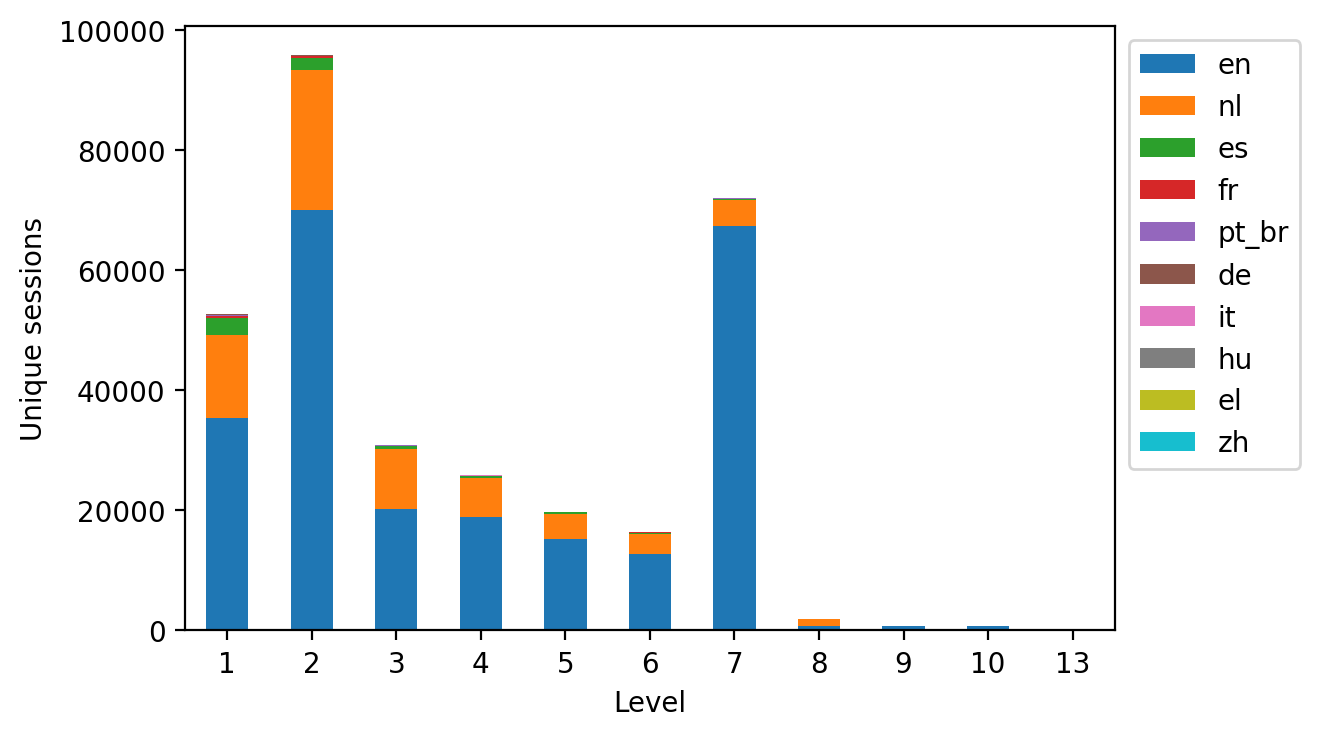

In [7]:
import matplotlib.ticker as mtick
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

df['level'] = pd.to_numeric(df.level, errors='coerce')
v = df['level'].value_counts()
df = df[df['level'].isin(v.index[v.gt(100)])]
df['level'] = df['level'].astype(int)

df = df.drop_duplicates(subset=['session'], keep='first')

languages = ['en', 'nl', 'es', 'fr', 'pt_br', 'de', 'it', 'hu', 'el', 'zh']
df_language = df[['level']].copy()
for language in languages:
    df_language[language] = df['lang'].str.contains(language)

df_level_count = df_language['level'].value_counts().reset_index()
df_level_count.columns = ['level', 'count']

df_language = df_language.groupby(by="level").sum()
df_language = pd.merge(df_language, df_level_count, on = "level", how = "inner") 

del df_language['count']   
df_language = df_language.set_index('level')

plot = df_language.plot(rot=0, kind='bar', stacked=True)
plot.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Level")
plt.ylabel("Unique sessions")